# Hyperparamètres, LassoRandomForestRregressor et grid_search (correction)

Le notebook explore l'optimisation des hyper paramaètres du modèle [LassoRandomForestRegressor](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/ensae_teaching_cs/ml/lasso_random_forest_regressor.html), et fait varier le nombre d'arbre et le paramètres alpha.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Données

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Premiers modèles

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
r2_score(y_test, rf.predict(X_test))

0.3166064611454491

Pour le modèle, il suffit de copier coller le code écrit dans ce fichier [lasso_random_forest_regressor.py](https://github.com/sdpython/ensae_teaching_cs/blob/master/src/ensae_teaching_cs/ml/lasso_random_forest_regressor.py).

In [5]:
from ensae_teaching_cs.ml.lasso_random_forest_regressor import LassoRandomForestRegressor
lrf = LassoRandomForestRegressor()
lrf.fit(X_train, y_train)
r2_score(y_test, lrf.predict(X_test))

0.20558896981102492

Le modèle a réduit le nombre d'arbres.

In [6]:
len(lrf.estimators_)

97

## Grid Search

On veut trouver la meilleure paire de paramètres (``n_estimators``, ``alpha``). *scikit-learn* implémente l'objet [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) qui effectue de nombreux apprentissage avec toutes les valeurs de paramètres qu'il reçoit. Voici tous les paramètres qu'on peut changer :

In [7]:
lrf.get_params()

{'lasso_estimator__alpha': 1.0,
 'lasso_estimator__copy_X': True,
 'lasso_estimator__fit_intercept': True,
 'lasso_estimator__max_iter': 1000,
 'lasso_estimator__positive': False,
 'lasso_estimator__precompute': False,
 'lasso_estimator__random_state': None,
 'lasso_estimator__selection': 'cyclic',
 'lasso_estimator__tol': 0.0001,
 'lasso_estimator__warm_start': False,
 'lasso_estimator': Lasso(),
 'rf_estimator__bootstrap': True,
 'rf_estimator__ccp_alpha': 0.0,
 'rf_estimator__criterion': 'squared_error',
 'rf_estimator__max_depth': None,
 'rf_estimator__max_features': 1.0,
 'rf_estimator__max_leaf_nodes': None,
 'rf_estimator__max_samples': None,
 'rf_estimator__min_impurity_decrease': 0.0,
 'rf_estimator__min_samples_leaf': 1,
 'rf_estimator__min_samples_split': 2,
 'rf_estimator__min_weight_fraction_leaf': 0.0,
 'rf_estimator__n_estimators': 100,
 'rf_estimator__n_jobs': None,
 'rf_estimator__oob_score': False,
 'rf_estimator__random_state': None,
 'rf_estimator__verbose': 0,
 'rf

In [8]:
params = {
    'lasso_estimator__alpha': [0.25, 0.5, 0.75, 1., 1.25, 1.5],
    'rf_estimator__n_estimators': [20, 40, 60, 80, 100, 120]
}

In [9]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

grid = GridSearchCV(estimator=LassoRandomForestRegressor(),
                    param_grid=params, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=LassoRandomForestRegressor(lasso_estimator=Lasso(),
                                                  rf_estimator=RandomForestRegressor()),
             param_grid={'lasso_estimator__alpha': [0.25, 0.5, 0.75, 1.0, 1.25,
                                                    1.5],
                         'rf_estimator__n_estimators': [20, 40, 60, 80, 100,
                                                        120]},
             verbose=1)

Les meilleurs paramètres sont les suivants :

In [10]:
grid.best_params_

{'lasso_estimator__alpha': 0.25, 'rf_estimator__n_estimators': 20}

Et le modèle a gardé un nombre réduit d'arbres :

In [11]:
len(grid.best_estimator_.estimators_)

20

In [12]:
r2_score(y_test, grid.predict(X_test))

0.23768343413832094

## Evolution de la performance en fonction des paramètres

In [13]:
grid.cv_results_

{'mean_fit_time': array([0.051863  , 0.11151867, 0.16286798, 0.20638132, 0.24587946,
        0.30230732, 0.04886923, 0.10883999, 0.1585783 , 0.21171408,
        0.25670881, 0.30813308, 0.04687281, 0.10599108, 0.16779151,
        0.21490512, 0.24286323, 0.37416844, 0.04798951, 0.10375576,
        0.13916297, 0.19486108, 0.23168812, 0.35405369, 0.04832931,
        0.10837116, 0.17046494, 0.21563282, 0.250454  , 0.30722728,
        0.0500711 , 0.10197167, 0.14489303, 0.19933763, 0.31132407,
        0.69930143]),
 'std_fit_time': array([0.00362419, 0.01626225, 0.00804797, 0.01572331, 0.00662523,
        0.01574959, 0.00169066, 0.0097691 , 0.0132841 , 0.0106317 ,
        0.01988724, 0.02359756, 0.00126011, 0.00448715, 0.00627981,
        0.02519122, 0.02605425, 0.09337497, 0.01102544, 0.00824485,
        0.00715579, 0.01587819, 0.006515  , 0.04939259, 0.00602516,
        0.00652839, 0.01898743, 0.01727985, 0.01794094, 0.02079929,
        0.00562965, 0.00345422, 0.00807745, 0.00482911, 0.095

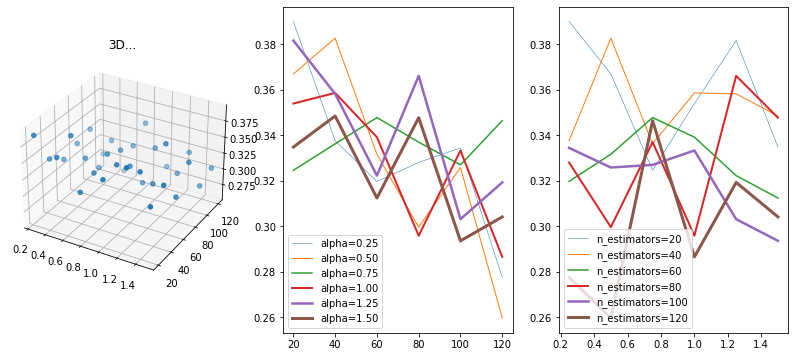

In [14]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(131, projection='3d')
xs = numpy.array([el['lasso_estimator__alpha'] for el in grid.cv_results_['params']])
ys = numpy.array([el['rf_estimator__n_estimators'] for el in grid.cv_results_['params']])
zs = numpy.array(grid.cv_results_['mean_test_score'])
ax.scatter(xs, ys, zs)
ax.set_title("3D...")

ax = fig.add_subplot(132)
for x in sorted(set(xs)):
    y2 = ys[xs == x]
    z2 = zs[xs == x]
    ax.plot(y2, z2, label="alpha=%1.2f" % x, lw=x*2)
ax.legend();

ax = fig.add_subplot(133)
for y in sorted(set(ys)):
    x2 = xs[ys == y]
    z2 = zs[ys == y]
    ax.plot(x2, z2, label="n_estimators=%d" % y, lw=y/40)
ax.legend();

Il semble que la valeur de alpha importe peu mais qu'un grand nombre d'arbres a un impact positif. Cela dit, il faut ne pas oublier l'écart-type de ces variations qui n'est pas négligeable.